In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
import json

#IDs CUUR0000SA0 = CPI
# APU0000702212 = Bread
# APU0000708111 = Eggs
# APU0000709112 = Milk

In [3]:
ID = ["CUUR0000SA0", "APU0000702212", "APU0000708111", "APU0000709112"]
num = [5,4,3,2,1,0]

IDs = []
Month = []
Stats = []



print('Hunting for Data')
print('-----------------------------')

for x in ID:
    headers = {'Content-type': 'application/json'}
    data = json.dumps({"seriesid": [x],"startyear":"2022", "endyear":"2022"})
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)
    
    for y in num:
        
        try:
            
            IDs.append(json_data['Results']['series'][0]['seriesID'])
            Month.append(json_data['Results']['series'][0]["data"][y]['periodName'])
            Stats.append(json_data['Results']['series'][0]["data"][y]['value'])
        

            print(f"finding ID #{x} for month #{y + 1}")
            time.sleep(1)
    
        except (KeyError, IndexError):
            print(f"Could not find ID #{x} for month #{y + 1}")
    

#print the end        
print("-----------------------------")
print("Data Retrieval Complete")   
print("-----------------------------")

Hunting for Data
-----------------------------
finding ID #CUUR0000SA0 for month #6
finding ID #CUUR0000SA0 for month #5
finding ID #CUUR0000SA0 for month #4
finding ID #CUUR0000SA0 for month #3
finding ID #CUUR0000SA0 for month #2
finding ID #CUUR0000SA0 for month #1
finding ID #APU0000702212 for month #6
finding ID #APU0000702212 for month #5
finding ID #APU0000702212 for month #4
finding ID #APU0000702212 for month #3
finding ID #APU0000702212 for month #2
finding ID #APU0000702212 for month #1
finding ID #APU0000708111 for month #6
finding ID #APU0000708111 for month #5
finding ID #APU0000708111 for month #4
finding ID #APU0000708111 for month #3
finding ID #APU0000708111 for month #2
finding ID #APU0000708111 for month #1
finding ID #APU0000709112 for month #6
finding ID #APU0000709112 for month #5
finding ID #APU0000709112 for month #4
finding ID #APU0000709112 for month #3
finding ID #APU0000709112 for month #2
finding ID #APU0000709112 for month #1
-----------------------------

In [4]:
#Import Monthly Beef Data
beefMonthly = pd.read_csv("InputData/Monthly 2022 Beef Prices.csv")

#Set Monthly Beef Data Index to Period
#Delete Year Column
bmonthly = beefMonthly.rename(columns = {"Period":"Month","Value":"Beef 2022"})
del bmonthly['Year']

#Plot the Monthly Beef Data
bmonthly

,Month,Beef 2022
0,January,5.170
1,February,5.199
2,March,5.342
3,April,5.414
4,May,5.332
5,June,5.402


In [5]:
#pull Dataframe
Stats2022 = pd.DataFrame({
    'ID #': IDs,
    'Month': Month,
    'Prices': Stats
})

#seperate into catogories
Bread = Stats2022.loc[(Stats2022['ID #'] == 'APU0000702212')]
Milk = Stats2022.loc[(Stats2022['ID #'] == 'APU0000709112')]
Egg = Stats2022.loc[(Stats2022['ID #'] == 'APU0000708111')]
Cpi = Stats2022.loc[(Stats2022['ID #'] == 'CUUR0000SA0')]

#First merge
X = Bread.merge(Milk, on="Month")

#Clean merge
Merge = pd.DataFrame({
    "Month": X["Month"],
    "Bread 2022": X["Prices_x"],
    "Milk 2022": X["Prices_y"]
})

#Second merge
Y = Merge.merge(Egg, on="Month")
Z = Y.merge(Cpi, on="Month")

#clean data
Alpha = pd.DataFrame({
    "Month": Z["Month"],
    "Bread 2022": Z["Bread 2022"],
    "Milk 2022": Z["Milk 2022"],
    "Eggs 2022": Z["Prices_x"],
    "CPI 2022": Z["Prices_y"]
}) 
Final = bmonthly.merge(Alpha, on="Month")

#Final = Alpha.set_index("Month")
Final


,Month,Beef 2022,Bread 2022,Milk 2022,Eggs 2022,CPI 2022
0,January,5.170,2.119,3.787,1.929,281.148
1,February,5.199,2.029,3.875,2.005,283.716
2,March,5.342,2.121,3.917,2.046,287.504
3,April,5.414,2.145,4.012,2.520,289.109
4,May,5.332,2.220,4.204,2.863,292.296
5,June,5.402,2.230,4.153,2.707,296.311


Bread Price V CPI for 2022 correlation: 0.8350337907016981


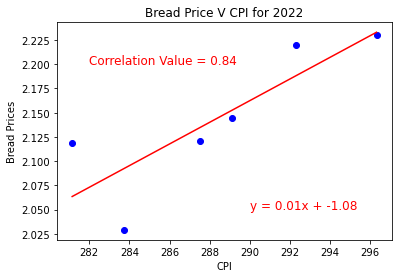

In [6]:
cpi2 = Final["CPI 2022"].astype("float")
bread2 = Final["Bread 2022"].astype("float")
milk2 = Final["Milk 2022"].astype("float")
egg2 = Final["Eggs 2022"].astype("float")
beef2 = Final["Beef 2022"].astype("float")

plt.scatter(cpi2, bread2, color='blue')
(slope, yIntercept, rvalue, pvalue, sterr) = linregress(cpi2, bread2)
plt.xlabel('CPI')
plt.ylabel('Bread Prices')
plt.title('Bread Price V CPI for 2022')
values = (cpi2 * slope) + yIntercept
plt.plot(cpi2, values, 'r')
line = f'y = {slope:.2f}x + {yIntercept:.2f}'
R = f'Correlation Value = {rvalue:.2f}'
plt.annotate(R,(282, 2.2), fontsize=12, color='r')
plt.annotate(line,(290, 2.05), fontsize=12, color='r')
print(f"Bread Price V CPI for 2022 correlation: {rvalue}")

plt.savefig('OutputData/Bread2022.png')

Beef Price V CPI for 2022 correlation: 0.8413247202999276


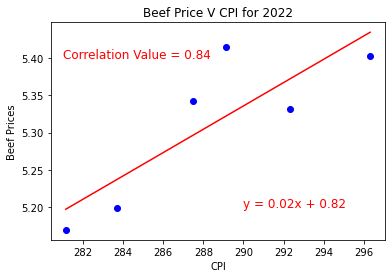

In [9]:
plt.scatter(cpi2, beef2, color='blue')
(slope, yIntercept, rvalue, pvalue, sterr) = linregress(cpi2, beef2)
plt.xlabel('CPI')
plt.ylabel('Beef Prices')
plt.title('Beef Price V CPI for 2022')
values = (cpi2 * slope) + yIntercept
plt.plot(cpi2, values, 'r')
line = f'y = {slope:.2f}x + {yIntercept:.2f}'
R = f'Correlation Value = {rvalue:.2f}'
plt.annotate(R,(281, 5.4), fontsize=12, color='r')
plt.annotate(line,(290, 5.2), fontsize=12, color='r')
print(f"Beef Price V CPI for 2022 correlation: {rvalue}")

plt.savefig('OutputData/Beef2022.png')

Milk Price V CPI for 2022 correlation: 0.9341177348267038


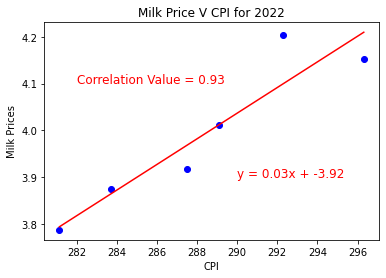

In [10]:
plt.scatter(cpi2, milk2, color='blue')
(slope, yIntercept, rvalue, pvalue, sterr) = linregress(cpi2, milk2)
values = (cpi2 * slope) + yIntercept
plt.plot(cpi2, values, 'r')
plt.xlabel('CPI')
plt.ylabel('Milk Prices')
plt.title('Milk Price V CPI for 2022')
line = f'y = {slope:.2f}x + {yIntercept:.2f}'
R = f'Correlation Value = {rvalue:.2f}'
plt.annotate(R,(282, 4.1), fontsize=12, color='r')
plt.annotate(line,(290, 3.9), fontsize=12, color='r')
print(f"Milk Price V CPI for 2022 correlation: {rvalue}")

plt.savefig('OutputData/Milk2022.png')

Egg Price V CPI for 2022 correlation: 0.887177505219944


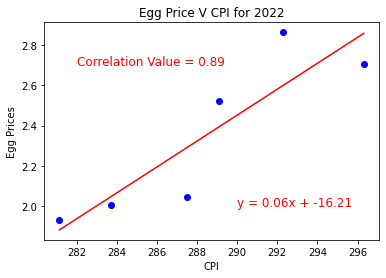

In [11]:
plt.scatter(cpi2, egg2, color='blue')
(slope, yIntercept, rvalue, pvalue, sterr) = linregress(cpi2, egg2)
plt.xlabel('CPI')
plt.ylabel('Egg Prices')
plt.title('Egg Price V CPI for 2022')
values = (cpi2 * slope) + yIntercept
plt.plot(cpi2, values, 'r')
line = f'y = {slope:.2f}x + {yIntercept:.2f}'
R = f'Correlation Value = {rvalue:.2f}'
plt.annotate(R,(282, 2.7), fontsize=12, color='r')
plt.annotate(line,(290, 2), fontsize=12, color='r')
print(f"Egg Price V CPI for 2022 correlation: {rvalue}")

plt.savefig('OutputData/Egg2022.png')